# **Kaggle House Prices**

# About Dataset
## Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

## Citation
Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques

# Download Dataset

In [1]:
# Install Kaggle API
! pip install kaggle


In [2]:
!mkdir ~/.kaggle

# Create API token
# Enter username and API key
with open("/root/.kaggle/kaggle.json", "w+") as f:
  f.write('{"username":"yakshujoodha","key": "0b159df1426633a956a953d1ecee9f85"}')

!chmod 600 ~/.kaggle/kaggle.json # Set permissions

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 56.8MB/s]


In [4]:
! mkdir house-prices-advanced-regression-techniques
! unzip house-prices-advanced-regression-techniques.zip -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


# Exploring the data

Inspired by Gusthema's Notebook (Competition Winner)

In [5]:
import pandas as pd
train_dataset_example = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
train_dataset_example.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_dataset_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Drop ID
train_dataset_example = train_dataset_example.drop('Id', axis=1)
train_dataset_example.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

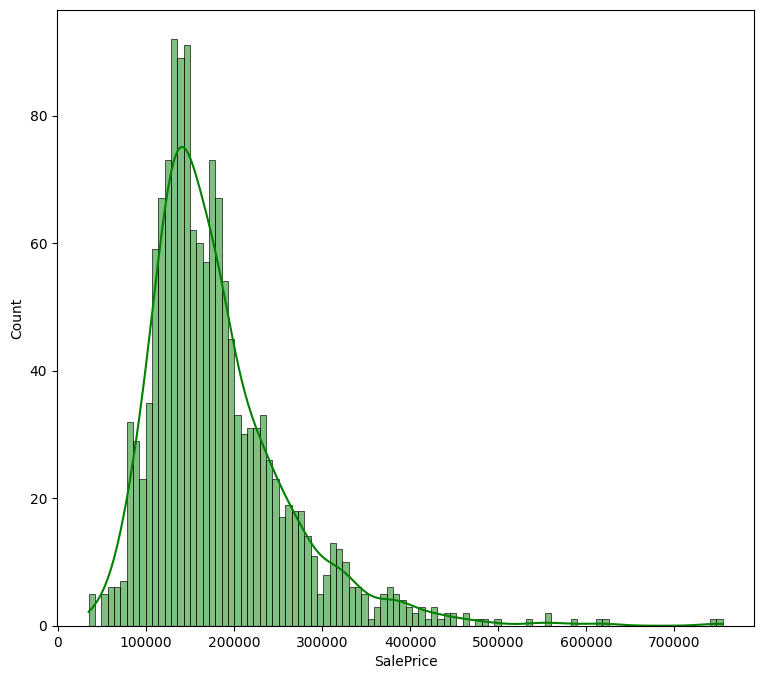

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Distribution
print(train_dataset_example['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(train_dataset_example['SalePrice'], color='g', bins=100, kde=True)


# House_Prices_Dataset Class

### Preprocessing (Inspired by Ryan's Notebook)

In [12]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, Sampler, random_split
from sklearn.preprocessing import OneHotEncoder
def preprocess_data(df, train = True):
  #Drop unnecessary ID column
  df.drop(['Id'], axis=1, inplace=True)

  #Fill in nan in saleprice
  df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

  #Drop columns with more than 70% nan
  column_with_multiple_nans = df.isnull().sum() > 0.7 * df.shape[0]
  column_with_multiple_nans = list(column_with_multiple_nans[column_with_multiple_nans].index)
  df = df.drop(column_with_multiple_nans, axis=1)

  #Fill nan for the rest of the dataset
  for col in df:
    df[col] = df[col].fillna(df[col].mode()[0])

  #opposite of several cold decoder
  s = (df.dtypes == 'object')
  object_cols = list(s[s].index)
  label_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
  label_encoded_columns = pd.DataFrame(label_encoder.fit_transform(df[object_cols]))
  label_encoded_columns.columns = label_encoder.get_feature_names_out()
  df = df.drop(object_cols, axis=1)
  df = pd.concat([df, label_encoded_columns], axis=1)

  return df



In [14]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, Sampler
class House_Prices_Train_Dataset(object):

  def __init__(self, filepath):
    # Convert to NumPy
    df = pd.read_csv(filepath)
    df = preprocess_data(df)

    self.x = df.drop('SalePrice', axis=1)
    self.y = df['SalePrice']
    self.x = torch.tensor(self.x.values, dtype=torch.float32)
    self.y = torch.tensor(self.y.values, dtype=torch.float32)

    self.y = self.y.reshape(-1, 1)

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, ind):
    x = self.x[ind]
    y = self.y[ind] / 100000
    return x, y



# Implementation

In [15]:
train_set = House_Prices_Train_Dataset('/content/house-prices-advanced-regression-techniques/train.csv')
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_dataset, test_dataset = random_split(train_set, [train_size, val_size])


In [19]:
print(type(train_dataset[0][0]))
print()
print(type(train_dataset[0][1]))
print(train_dataset[0][1])
print()
print(type(test_dataset[0]))
print()
print(train_dataset[0][0].shape) # 1D array with 274 features (Input)
print()
print(train_dataset[0][1].shape) # Scalar matrix 0D

<class 'torch.Tensor'>

<class 'torch.Tensor'>
tensor([1.2850])

<class 'tuple'>

torch.Size([274])

torch.Size([1])


# Designing MLP Architechture

In [20]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(274, 135),
            nn.ReLU(),
            nn.Linear(135, 65),
            nn.ReLU(),
            nn.Linear(65, 30),
            nn.ReLU(),
            nn.Linear(30, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MLP().to(device)
print(model)

Using cpu device
MLP(
  (layers): Sequential(
    (0): Linear(in_features=274, out_features=135, bias=True)
    (1): ReLU()
    (2): Linear(in_features=135, out_features=65, bias=True)
    (3): ReLU()
    (4): Linear(in_features=65, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=1, bias=True)
  )
)


In [32]:
def train_or_test(dataloader, model, loss_fn, loss_list, optimizer=None, train=True):
  if train:
    model.train()
  else:
    model.eval()

  num_batches = len(dataloader)
  total_loss = 0

  with torch.set_grad_enabled(train):  # Enable/disable gradient calculation
    for batch_num, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      output = model(X)
      loss = loss_fn(output, y)
      total_loss += loss.item()
      loss_list.append(loss.item())

      if train:  # Only perform optimization during training
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  avg_loss = total_loss / num_batches
  if train:
    print(f"Average loss: {avg_loss:.7f}")

  else:
    print(f"Test Average loss: {avg_loss:.7f}")

  return avg_loss

def train(data_loader, model, criterion, optimizer, loss):
    train_or_test(data_loader, model, criterion, loss, optimizer, train=True)

def test(data_loader, model, criterion, loss):
    train_or_test(data_loader, model, criterion, loss, train=False)

In [22]:
# Cross Entropy Loss Function and Adam Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [24]:
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape} {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
print(train_set[0])

Shape of X [N, C, H, W]: torch.Size([50, 274]) torch.float32
Shape of y: torch.Size([50, 1]) torch.float32
(tensor([6.0000e+01, 6.5000e+01, 8.4500e+03, 7.0000e+00, 5.0000e+00, 2.0030e+03,
        2.0030e+03, 1.9600e+02, 7.0600e+02, 0.0000e+00, 1.5000e+02, 8.5600e+02,
        8.5600e+02, 8.5400e+02, 0.0000e+00, 1.7100e+03, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 8.0000e+00, 0.0000e+00,
        2.0030e+03, 2.0000e+00, 5.4800e+02, 0.0000e+00, 6.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0080e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.00

In [33]:
%%time

epochs = 50
train_loss = []
test_loss = []
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_loader, model, criterion, optimizer, train_loss)
    print(f"Testing epoch: {epoch+1}")
    test(test_loader, model, criterion, test_loss)

Training epoch: 1
Average loss: 629.2800249
Testing epoch: 1
Test Average loss: 276.2943974
Training epoch: 2
Average loss: 113.8574068
Testing epoch: 2
Test Average loss: 44.7110818
Training epoch: 3
Average loss: 30.0166448
Testing epoch: 3
Test Average loss: 19.3128010
Training epoch: 4
Average loss: 7.9128840
Testing epoch: 4
Test Average loss: 2.5572129
Training epoch: 5
Average loss: 1.0062511
Testing epoch: 5
Test Average loss: 1.1015192
Training epoch: 6
Average loss: 0.7743941
Testing epoch: 6
Test Average loss: 0.6630884
Training epoch: 7
Average loss: 1.1650607
Testing epoch: 7
Test Average loss: 0.6838829
Training epoch: 8
Average loss: 0.7549607
Testing epoch: 8
Test Average loss: 1.8210930
Training epoch: 9
Average loss: 7.0570253
Testing epoch: 9
Test Average loss: 4.6472201
Training epoch: 10
Average loss: 16.3045879
Testing epoch: 10
Test Average loss: 35.6090344
Training epoch: 11
Average loss: 65.3345500
Testing epoch: 11
Test Average loss: 37.0571006
Training epoch:

# Plotting Results

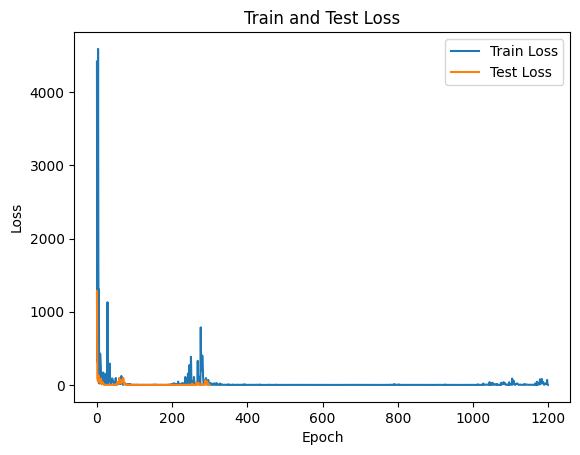

In [35]:
import matplotlib.pyplot as plt

# Create a single subplot (1, 1) instead of (2, 1)
fig, ax1 = plt.subplots(1, 1)

# Plot train and test loss on the same subplot
ax1.plot(train_loss, label='Train Loss')
ax1.plot(test_loss, label='Test Loss')

# Set labels and title
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train and Test Loss')  # Changed title to be more accurate

# Display legend
ax1.legend()

# Show the plot
plt.show()